# Projet: Modèle de prédiction des maladies cardiaques en utilisant la machine Learning


## Introduction

Les maladies cardiaques sont la principale cause de décès dans le monde. Elles ont entraîné 17,9 millions de décès (32,1 %) en 2015, contre 12,3 millions (25,8 %) en 1990. On estime que 90 % des CVD sont évitables. Il existe de nombreux facteurs de risque pour les maladies cardiaques que nous allons examiner de plus près.

L'objectif principal de cette étude est de construire un modèle capable de prédire la survenue d'une maladie cardiaque, sur la base d'une série de caractéristiques (facteurs de risque) décrivant la maladie. Différentes techniques de classification par machine learning seront mises en œuvre et comparées à des performances standard telles que la précision.
Le jeu de données utilisé pour cette étude provient du référentiel de machines learning de l'UCI.

L'étude suivra les étapes suivantes:

1. Structure et description de la base de données


2. Exploration et identification des données
 
    2.1. Variable cible
    
    2.2. Variables catégorielles
    
    3.2. Variables numériques


3. Analyse approfondie des données
    
    3.1. Analyse descreptive
    
    3.2. Analyse des componsantes principales ACP
    
    3.3. Variables numériques



4. Préparation des données


5. Modélisation et prédiction

    5.1. K-Nearest Neighbours (KNN)
    
    5.2. Arbres de décision (Decision Tree)
    
    5.3. Régression logistique
    
    5.4. Gaussian Naive Bayes
    
    5.5. Machine à vecteurs de support (Support Vector Machines)
    
    5.6. Forêt d’arbre de décision (Random Forests)


6. Conclusion

### Importation de bibliothèques

In [24]:
# l'analyse, le traitement et le classement des données
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Ananlyse des Composantes Principales ACP
from sklearn.decomposition import PCA 
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## 1. Structure et description de la base de données

Le jeu de données utilisé dans le projet contient 14 variables. La variable indépendante qui doit être prédite(la varaible cible), le "diagnosis", détermine si une personne est en bonne santé ou si elle souffre d'une maladie cardiaque. Les expériences menées avec la base de données Cleveland se sont essentiellement focalisées sur les efforts visant à distinguer la présence de la maladie (valeurs 1, 2, 3, 4) de son absence (valeur 0). Il y a plusieurs valeurs d'attribut manquantes, distinguées par le symbole " ?". La ligne d'en-tête est manquante dans cet ensemble de données, les noms des colonnes doivent donc être ajoutés manuellement.

Informations sur les variables:
* age - âge en années
* sex - sexe (1 = homme ; 0 = femme)
* chest_pain - type de douleur thoracique (1 = angine typique ; 2 = angine atypique ; 3 = douleur non angineuse ; 4 = asymptomatique)
* blood_pressure - la pression artérielle au repos (en mm Hg à l'admission à l'hôpital)
* serum_cholestoral - cholestérol sérique en mg/dl
* fasting_blood_sugar - glycémie à jeun > 120 mg/dl (1 = vrai ; 0 = faux)
* électrocardiographique - résultats de l'électrocardiographie au repos (0 = normal ; 1 = présentant un ST-T ; 2 = hypertrophie)
* max_heart_rate - fréquence cardiaque maximale atteinte
* induced_angina - angine de poitrine provoquée par un effort physique (1 = oui ; 0 = non)
* ST_depression - Sous-décalage du segment S-T provoquée par une activité physique relative au repos
* slope - Le pente de ST segment au peak exercise (pic d'effort et d'exercice) (1 = pente ascendante ; 2 = pente faible ; 3 = pente descendante)
* no_of_vessels - nombre de vaisseaux principaux (0-3) colorés par la flourosopie
* thal - 3 = normal ; 6 = défaut fixe ; 7 = défaut réversible
* diagnosis - la valeur cible - diagnostic de la maladie du coeur (statut de la maladie à l'angiographie) (Valeur 0 = < 50% de rétrécissement du diamètre ; Valeur 1 = > 50% de rétrécissement du diamètre)

Types des variables :
* Variables catégorielles (Possède deux catégories ou plus et chaque valeur de cette variables peut être catégorisée par celles-ci) : sex, chest_pain

* Variables ordinales (Variable ayant un ordre ou un tri relatif entre les valeurs) : fasting_blood_sugar, electrocardiographic, induced_angina, slope, no_of_vessels, thal, diagnosis

* Variables continues (Variable prenant des valeurs entre deux points quelconques ou entre les valeurs minimales ou maximales dans la colonne des variables) :age, blood_pressure, serum_cholestoral, max_heart_rate, ST_depression

### Chargement des données

In [71]:
# Changement de répertoire courant 
import os
os.chdir("C:\ML")

# les noms de colonnes en fonction des informations sur les éléments.
col_names = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']

# lecture du fichier
df = pd.read_csv("MaladiesCardiaques.data", names=col_names, header=None, na_values="?")


In [72]:
# dimension
print("Number of records: {}\nNumber of variables: {}".format(df.shape[0], df.shape[1]))

# display the first 5 lines
df.head()

Number of records: 303
Number of variables: 14


,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    float64
 1   sex                   303 non-null    float64
 2   chest_pain            303 non-null    float64
 3   blood_pressure        303 non-null    float64
 4   serum_cholestoral     303 non-null    float64
 5   fasting_blood_sugar   303 non-null    float64
 6   electrocardiographic  303 non-null    float64
 7   max_heart_rate        303 non-null    float64
 8   induced_angina        303 non-null    float64
 9   ST_depression         303 non-null    float64
 10  slope                 303 non-null    float64
 11  no_of_vessels         299 non-null    float64
 12  thal                  301 non-null    float64
 13  diagnosis             303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [28]:
# extraire les colonnes quantitatives (numériques) et identifier les colonnes qualitatives (catégorielles).
numeric_columns = ['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']
categorical_columns = [c for c in df.columns if c not in numeric_columns]
print(categorical_columns)

['sex', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina', 'slope', 'no_of_vessels', 'thal', 'diagnosis']


## 2.  Exploration et identification des données 

### 2.1. Variable cible
Il est indispensable de connaître la distribution de la valeur cible pour choisir les paramètres de précision (accuracy metrics) appropriés et, par conséquent, évaluer correctement les différents modèles de machine learning.

In [29]:
# compter les valeurs de la variable expliquée
df.diagnosis.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: diagnosis, dtype: int64

=> Comme les valeurs 1 à 4 indiquent la présence d'une maladie, il est logique de les regrouper.

In [30]:
# créer un vecteur booléen et le faire correspondre aux valeurs respectives (True=1, False=0)
df.diagnosis = (df.diagnosis != 0).astype(int)
df.diagnosis.value_counts()

0    164
1    139
Name: diagnosis, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


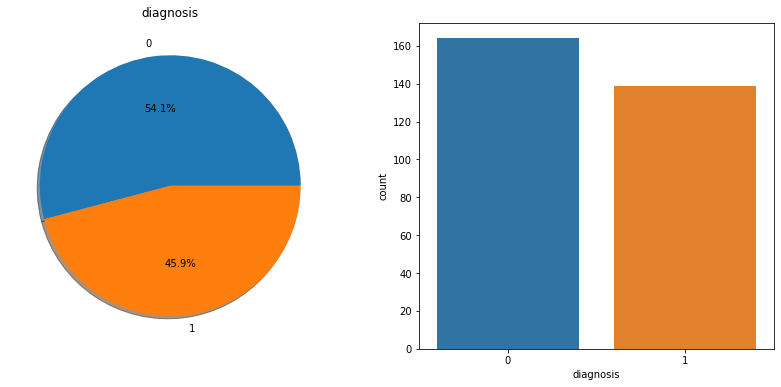

In [31]:
# créer deux plots side by side
f, ax = plt.subplots(1,2,figsize=(14,6))
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis', data=df, ax=ax[1])
plt.show()

=> Maintenant, la distribution de la valeur cible est presque égale, donc l'utilisation de métriques standard dans la modélisation de la machine learning comme la précision et l'AUC est justifiée.

### 2.2. Variables catégorielles
Nous allons examiner de plus près les variables catégorielles et voir comment elles influencent notre variable cible.

In [32]:
# compter les personnes malades et les personnes en bonne santé groupées par sexe
df.groupby(['sex','diagnosis'])['diagnosis'].count()

sex  diagnosis
0.0  0             72
     1             25
1.0  0             92
     1            114
Name: diagnosis, dtype: int64

In [33]:
# nombre moyen de personnes diagnostiquées, groupées par nombre de vaisseaux sanguins détectés par fluoroscopie
df[['no_of_vessels','diagnosis']].groupby('no_of_vessels').mean()

,diagnosis
no_of_vessels,
0.0,0.261364
1.0,0.676923
2.0,0.815789
3.0,0.850000


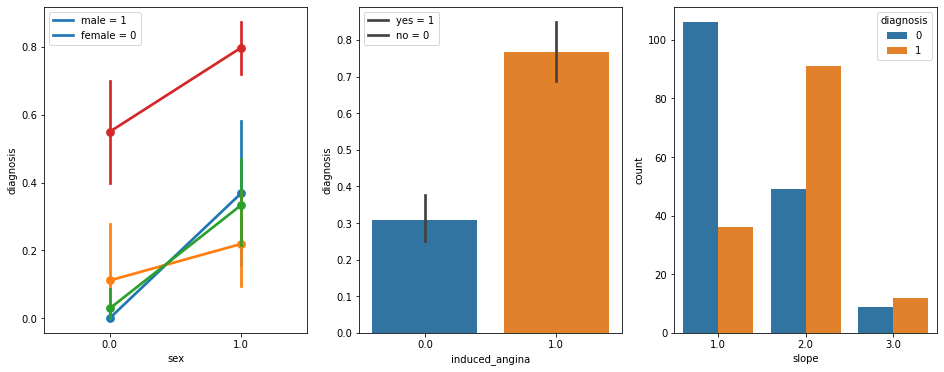

In [34]:
# créer un diagramme en paires et deux diagrammes en bâtons
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="diagnosis", hue='chest_pain', data=df)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="induced_angina", y="diagnosis", data=df)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='diagnosis', data=df)
plt.show()

### Observations :
1- Les hommes sont beaucoup plus susceptibles d'avoir une maladie cardiaque que les femmes.

2- Plus le nombre de vaisseaux détectés par fluoroscopie est élevé, plus le risque de maladie est important.

3- Alors qu'une douleur thoracique (chest pain) faible peut être un mauvais symptôme de problème cardiaque potentiel (surtout chez les hommes), une forte douleur est un avertissement sérieux

4- Le risque de maladie cardiaque peut même être multiplié par trois pour une personne ayant souffert d'une angine stable induite par l'effort.

5- La pente faible (valeur = 2) et la pente descendante (valeur = 3) du pic d'effort et d'exercice (slope) indiquent un risque élevé de souffrir d'une maladie.

<AxesSubplot:xlabel='fasting_blood_sugar', ylabel='diagnosis'>

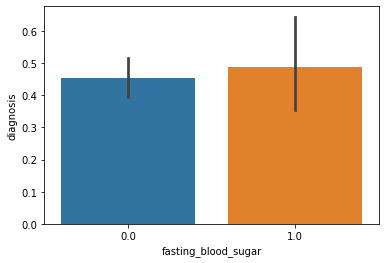

In [35]:
# créer un barplot
sns.barplot(x="fasting_blood_sugar", y="diagnosis", data=df)

=> La distribution presque égale suggère que la glycémie à jeun (fasting blood sugar) est une variable très faible pour notre prédiction, elle peut donc être exclue de notre modèle. Il est peu probable que le maintien de cette variable améliore la précision de notre modèle, mais il ne devrait pas non plus la réduire. Je décide de garder cette variable telle quelle et de confirmer mon hypothèse en vérifiant la valeur des paramètres de quelques modèles.

### 2.3. Variables numériques 
Il y a 5 colonnes numériques, alors commençons par nous y attaquer. L'apparition de valeurs aberrantes dans le jeu de données peut être le résultat d'une mauvaise entrée et créer un bruit indésirable, notre objectif est donc d'évaluer leur contenu. Une variable est considérée comme aberrante lorsqu'elle se situe en dehors de 3 écarts-types.

In [36]:
# Analyse ou l’étude descriptive sur les données 
df[numeric_columns].describe()

,serum_cholestoral,max_heart_rate,age,blood_pressure,ST_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,246.693069,149.607261,54.438944,131.689769,1.039604
std,51.776918,22.875003,9.038662,17.599748,1.161075
min,126.000000,71.000000,29.000000,94.000000,0.000000
25%,211.000000,133.500000,48.000000,120.000000,0.000000
50%,241.000000,153.000000,56.000000,130.000000,0.800000
75%,275.000000,166.000000,61.000000,140.000000,1.600000
max,564.000000,202.000000,77.000000,200.000000,6.200000


=> Toutes les valeurs extrêmes (min/max) peuvent se produire dans un scénario clinique réel, d'où la décision est de les garder telles quelles.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

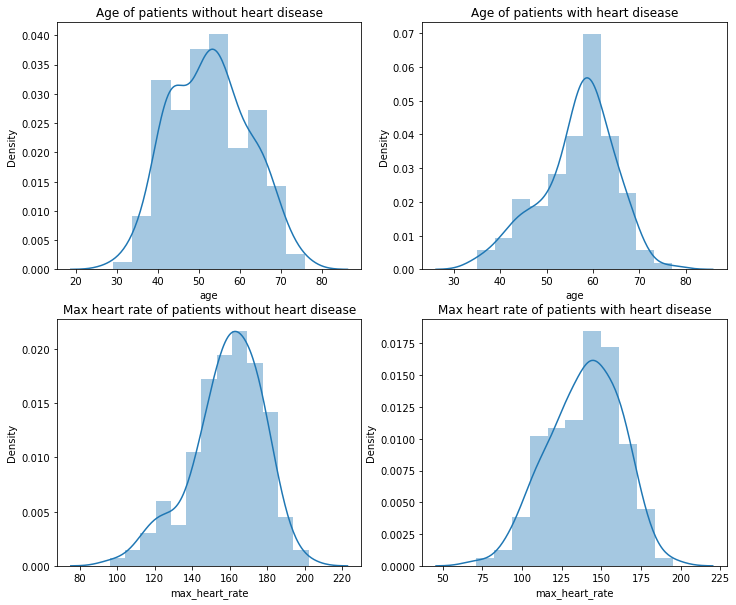

In [37]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['diagnosis']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['diagnosis']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['diagnosis']==0].max_heart_rate)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['diagnosis']==1].max_heart_rate)
plt.title('Max heart rate of patients with heart disease')
plt.show()

=> La distribution par âge des patients en bonne santé est beaucoup plus large que celle des personnes malades. Ces derniers présentent le risque le plus élevé à partir de la soixantaine. La distribution de Max_heart_rate ne diffère pas autant, mais le risque est maximal lorsque la valeur de la fréquence cardiaque maximale (max_heart_rate) se situe entre 150 et 170. Les valeurs plus élevées sont plus fréquentes chez les patients en bonne santé. Les graphiques ci-dessous nous donneront une autre perspective.

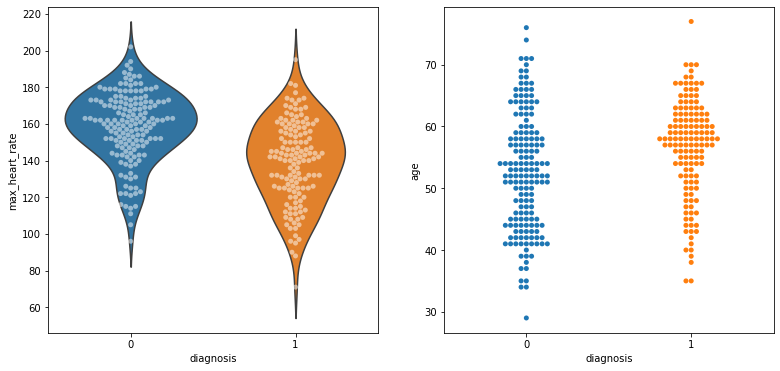

In [38]:
# create swarmplot inside the violinplot
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="diagnosis", y="max_heart_rate", data=df, inner=None)
sns.swarmplot(x='diagnosis', y='max_heart_rate', data=df, color='w', alpha=0.5)
plt.subplot(122)
sns.swarmplot(x='diagnosis', y='age', data=df)
plt.show()

## 3. Analyse approfondie des données

Dans cette partie, notre objectif est de faire une  analyse approfondie sur les données en applicant l'ACP sans oublier la partie descreptive. En terme de faisabilité de la méthode ACP, on a décidé d'effectuer cette étape sur la partie des variables numériques vue que l'ACP est applicable uniquement sur cette partie des données.

### 3.1. Analyse descreptive

On peut obtenir une idée sur les relations entre les variables de valeurs numériques en représentant chaque paire sous une forme dispersée. Pour ce faire efficacement, la méthode pairplot de la bibliothèque Seaborn est très utile.

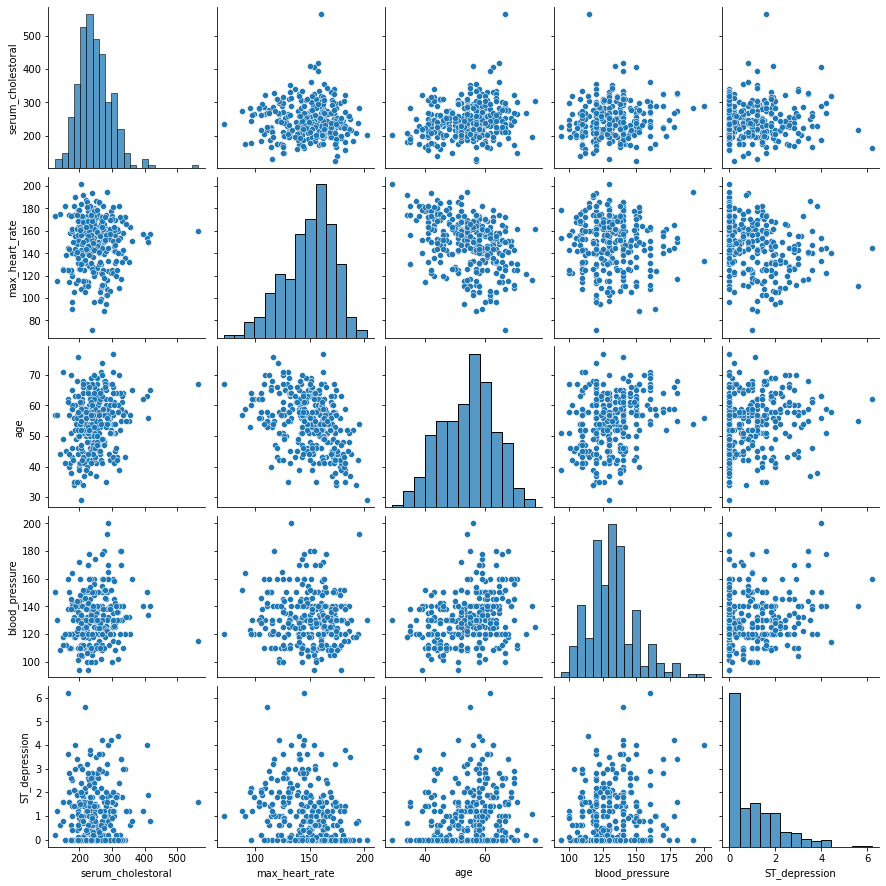

In [39]:
# Analyse graphique dimensionnelle 
sns.pairplot(df[numeric_columns])
plt.show()

=> En observant les graphiques ci-dessus, j'en déduis qu'aucune des paires des variables affichées ne présente une corrélation explicitement élevée. Je remarque également une corrélation négative entre 'age' et 'max_heart_rate' et une corrélation positive entre 'age' et 'blood_pressure', ce qui est naturel.

Une matrice de corrélation nous permettra de vérifier si ce qui est décrit ci-dessus est correct.

In [40]:
# Matrice de corrélation 
corr = df[numeric_columns].corr ()
print (corr)

                   serum_cholestoral  max_heart_rate       age  \
serum_cholestoral           1.000000       -0.003432  0.208950   
max_heart_rate             -0.003432        1.000000 -0.393806   
age                         0.208950       -0.393806  1.000000   
blood_pressure              0.130120       -0.045351  0.284946   
ST_depression               0.046564       -0.343085  0.203805   

                   blood_pressure  ST_depression  
serum_cholestoral        0.130120       0.046564  
max_heart_rate          -0.045351      -0.343085  
age                      0.284946       0.203805  
blood_pressure           1.000000       0.189171  
ST_depression            0.189171       1.000000  


=> En évaluant les coefficients de corrélations, on peut confirmer ce qui est mentionnée ce-dessous, toutes les variables ne présente une corrélation explicitement élevée, le plus élevé coefficient de corrélation dont la valeur la plus proche de 1 par rapport aux autres (0.28); est celle calculé entre les deux variables 'age' et 'blood_pressure'
Concernat les variables les plus corrélées négativement, on trouve comme observé: 'age' et 'max_heart', avec une coefficenet de corrélation de -0.39.
Pour les variables qui présentent une relation d'abscence de corrélation dont la valeur est trés proche de 0, on peut citer comme variables: 'serum_cholestoral' et 'max_heart_rate'   

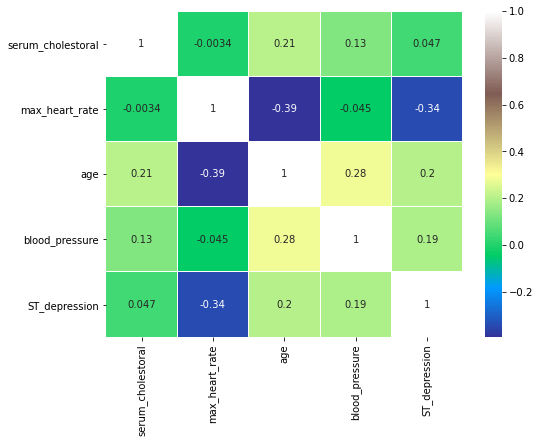

In [41]:
# create a correlation heatmap
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

=> Outre les relations mentionnées ci-dessus, il existe une autre dépendance plus importante : 'max_heart_rate' et 'ST_depression'. La conclusion est que les deux variables, 'age' et 'max_heart_rate', joueront un rôle important dans la prédiction des maladies cardiaques. 

In [42]:
# centree et reduire les donnees
#installer sklearn
#pip install sklearn
import sklearn
from sklearn import preprocessing
data_cr = preprocessing.scale(df[numeric_columns])
print(data_cr)

[[-0.2649003   0.01719733  0.94872647  0.75752504  1.08733806]
 [ 0.76041519 -1.82190531  1.39200191  1.61121989  0.39718162]
 [-0.34228261 -0.90235399  1.39200191 -0.6652997   1.34614673]
 ...
 [-2.23814899 -1.51538821  0.28381332 -0.0961698   0.13837295]
 [-0.20686358  1.06811312  0.28381332 -0.0961698  -0.89686172]
 [-1.38694368  1.02432497 -1.82174501  0.35913411 -0.89686172]]


=> Une fois qu’on a centré et réduire les données; par conséquence toute donnée centré réduite va admettre comme moyenne 0 et comme variance (std) 1 et pour vérifier cela on utilise la bibliothèque numpy pour calculer la moyenne et l’écart type STD

In [45]:
#moyenne
print(np.mean(data_cr,axis=0))
#écart-type
print(np.std(data_cr,axis=0))

[ 2.34502553e-16 -1.17251277e-16 -1.46564096e-18  4.42623569e-16
  2.34502553e-17]
[1. 1. 1. 1. 1.]


### 3.2. ACP

Le principe de cette méthode est simple : Il s’agit en fait de résumer l’information qui est contenue dans une large base de données en un certain nombre de variables synthétiques appelées : Composantes principales. 

L’idée est ensuite de pouvoir projeter ces données sur l’hyperplan le plus proche afin d’avoir une représentation simple de nos données.Évidemment, qui dit réduction de dimension dit perte d’informations. C’est là tout l’enjeu que représente une Analyse en Composantes principales. Il faut pouvoir réduire la dimension de nos données tout en conservant un maximum d’informations.

In [46]:
#instanciation 
acp = PCA(n_components=5)
acp.fit(data_cr)

PCA(n_components=5)

On utilise la Library PCA avec 5 composantes car on a 5 variables d’étude, avec cet objet ACP on va avoir tous les résultats de ACP. 
acp.fit cad on va appliquer l’acp dans notre base centré réduite 

In [47]:
#nombre de composantes calculées
print(acp.n_components_)
#variance expliquée 
print(acp.explained_variance_)
#proportion de variance expliquée (% information)
print(acp.explained_variance_ratio_)
eigval = acp.explained_variance_ 
print(eigval)

5
[1.80314365 1.09481913 0.87751605 0.76526797 0.47580949]
[0.35943854 0.21824117 0.17492399 0.15254847 0.09484783]
[1.80314365 1.09481913 0.87751605 0.76526797 0.47580949]


1) Acp.n_components = on obtient le nombre des composantes principales 

2) Acp.explained_variance_ = on obtient les valeurs propres

3) Acp.explained_varaince_ratio_ = on obtient le % d’informations 

4) Eigval =  Acp.explained_varaince_ = on construit le vecteur des valeurs propres 

Comme on a vu dans l’ACP : on diagonalise la matrice de corrélation afin de déterminer les valeurs propres et puis les vecteurs propres.
Après calculer les valeurs propres et le pourcentage d’information, on va décider à ce niveau combien d’axes on va choisir avec lesquelles on va travailler.

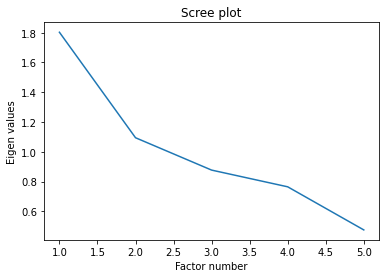

In [48]:
#importation librairie graphique
import matplotlib.pyplot as plt
#scree plot 
p = df[numeric_columns].shape[1]
plt.plot(np.arange(1,p+1),eigval) 
plt.title("Scree plot") 
plt.ylabel("Eigen values") 
plt.xlabel("Factor number") 
plt.show()

=> On trace un graphique sur les valeurs propres (de lamda 1 jusqu’à lamda 5) car on veut à partir de ce graphe chercher à quel niveau il y aura une chute sur les valeurs propres parce que ces derniéres sont considérées comme le part d’inertie (chaque valeurs propres a une part d’inertie = pourcentage d’info),
La chute est partir de 2éme valeur propre, 3éme valeur et aussi la 4éme valeur donc chute de pourcentage d’information sur 3 phases.
=> Je vais montrer prochainement deux représentations de la matrice corrélation facteurs-variables.

In [49]:
#le champ components_ de l'objet ACP 
print(acp.components_)
#nombre d'observations 
n = df[numeric_columns].shape[0] 
#valeur corrigée 
eigval = (n-1)/n*acp.explained_variance_ 
print(eigval)

[[-0.24080768  0.50463757 -0.56841107 -0.38205425 -0.46722156]
 [ 0.68607406  0.48092214  0.11287978  0.4270884  -0.32073343]
 [ 0.53385191 -0.30697148  0.1813323  -0.73176409 -0.22893354]
 [ 0.39288317  0.17098266 -0.51762369 -0.14083663  0.72707531]
 [ 0.17877081 -0.62497061 -0.6027863   0.34105191 -0.31270594]]
[1.79719268 1.09120586 0.87461996 0.76274233 0.47423916]


=> Il s'agit d'une étape de correction des valeurs propres: on multiplie les valeurs propres (le vecteur eigval * n-1/n) pour obtenir les vraies valeurs propres. 

In [50]:
#racine carrée des valeurs propres 
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes 
corvar = np.zeros((p,p)) 
for k in range(p): corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k] 
#afficher la matrice des corrélations variables x facteurs 
print(corvar)

[[-0.32282536  0.71667845  0.49926427  0.34312499  0.12311056]
 [ 0.67651418  0.50237511 -0.28708316  0.14932791 -0.43038616]
 [-0.76200856  0.11791512  0.16958399 -0.45206727 -0.41510893]
 [-0.51217969  0.44613996 -0.68435396 -0.12299984  0.23486548]
 [-0.62635449 -0.33504071 -0.21410121  0.6349921  -0.21534502]]


=> On a calculé la matrice des coordonnées des composantes principales dans la base de variable à partir du programme = qui est la matrice de corrélation entre les variables et les facteurs.

In [51]:
#on affiche pour les 3 premiers axes 
print(pd.DataFrame({'id': df[numeric_columns].columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1], 'COR_3':corvar[:,2]}))

                  id     COR_1     COR_2     COR_3
0  serum_cholestoral -0.322825  0.716678  0.499264
1     max_heart_rate  0.676514  0.502375 -0.287083
2                age -0.762009  0.117915  0.169584
3     blood_pressure -0.512180  0.446140 -0.684354
4      ST_depression -0.626354 -0.335041 -0.214101


In [52]:
#on affiche pour les 2 premiers axes 
print(pd.DataFrame({'id': df[numeric_columns].columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                  id     COR_1     COR_2
0  serum_cholestoral -0.322825  0.716678
1     max_heart_rate  0.676514  0.502375
2                age -0.762009  0.117915
3     blood_pressure -0.512180  0.446140
4      ST_depression -0.626354 -0.335041


=> On a démontré deux représentatives de la matrice corrélation composantes-variables dans le but de montrer la différence entre les deux choix (2 vecteurs propres ou 3 vecteurs propres):
La troisiéme composante porte des coefficents dont les valeurs ne sont pas trés proche de 1, c'est à dire ne dévoilent pas des relations de corrélations ni positives ni négatives pour nous améner à interpréter leurs comportements.
Pour cela, j'ai choisi de travailler uniquement avec les deux premiéres composantes vue l'importance de pourcentage d'information et dans le but de simplifier l'analyse et arracher les interprétations pertinentes facilement sur un plan R2.

Analyse de la matrice avec les deux COR_1 et COR_2:

=> A partir de cette matrice et puisqu’on a choisi de travailler uniquement sur deux vecteurs ceux qui portent le pourcentage le plus grand d’information, en nommant la première colonne COR_1 et la deuxième colonne COR_2
L’objectif de ce calcule est de donner une identification à ces deux composantes cor1 et cor2 puisqu’ells sont très intéressantes dans notre domaine de médecine et pour notre cas et car ells représentent plus de 80% de l’information. 
Donc il faut comprendre qu’est ce qu’ils représentent réellement dans ce domaine et pour faire cette partie d’analyse importante :la première étape consiste à chercher les variables fortement corrélées et La deuxième partie c’est de chercher le caractère commun entre ces variables fortement corrélées. 

max_heart_rate, age, blood_pressure et ST_depression sont les 4 variables les plus fortement corrélées à COR_1 et pour la COR_2 on trouve la variable serum_cholestoral, max_heart_rate, blood_prssure et la hauteur qui sont les plus fortement corrélées.

En analysant chaque composnate indépendament, on peut interpréter que sur la preméire COR_1, l'age, la pression relatif au sang, et la ST_depression sont négativement corrélées et la plus grande valeur qui proche la plus à 1 présentée par la variable age (-0.76).

=> On peut dire que avec l'age a un impacte important sur l'état de sang.

Concernant la deusiéme composante COR_2, la valeur qui est la plus proche de 1, correspond à la variable serum_cholestoral (0.7166) et on trouve aussi la variable max_heart_rate(0.5023)

=> Le cholestérol dans le sang un effet directe sur le rythme cardiaque. 

L'identification des axes est devenu plus claire avec l'analyse des coordonnées sur chacune des COR_1 et COR_2: 
le COR_1 présente donc le veilliessement de la personne,le sang vieillit avec l'âge, et c'est naturel aussi puisque tout le système immunitaire s'affaiblit avec le temps.
Le COR_2 présente l'effet de cholestérol sur le fonctionnement du coeur. 

=> Finalement, je peux conclure en se basant sur les résultats de notre travail sur les composantes principales, que le veillissment et la quantité de cholestérol mesurée dans le sang ont un effet important sur le fonctionnement de notre coeur.



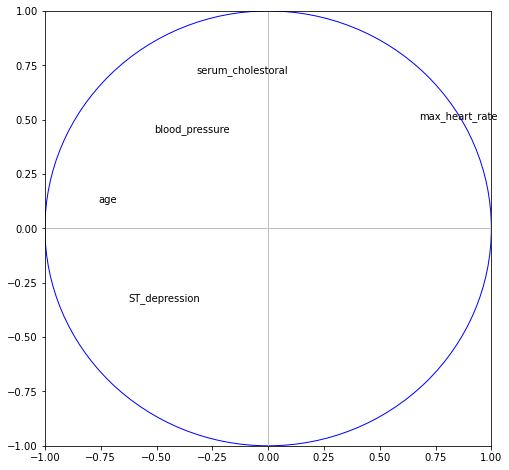

In [53]:
#cercle des corrélations 
fig, axes = plt.subplots(figsize=(8,8)) 
axes.set_xlim(-1,1) 
axes.set_ylim(-1,1) 
#affichage des étiquettes (noms des variables) 
for j in range(p): plt.annotate(df[numeric_columns].columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes 
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle 
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle) 
#affichage 
plt.show()


=> Les axes de ce cercle représentent les deux composantes principales ou on va faire une projection de l’ensemble des variables centrées réduites sur le plan u1 et u2 
Le cercle montre le meilleur plan pour l’analyse car il représente plus de l’information 


=> Avec cette présentation graphique du plan avec les deux axes cor1 et cor 2 et la projection de 5 variables. 
On peut trouver les corrélations clairement, en suivant les régles suivantes:
* si l'angle est aigu entre deux variables = corrélation positive 
* Si l'angle obtu = corrélation négative 
* Si l'angle droit = absence de corrélation 
Pour les corrélations positives: on trouve les deux variables 'age' et 'bold-pressure', les variables 'age' et 'ST_depression' et 'blood_pressure' et 'serum_cholestoral'.
Pour l'absence de corrélation: on a les varaibles 'max_heart_rate' et 'blood pressure', ainsi que 'max_heart_rate' et 'serum_cholestoral'
Pour les corrélations négatives: on observe les variables 'max_heart_rate' et 'age', 'max_heart_rate' et 'ST_depression'.

### Conclusion de l'ACP
Finalement selon la méthode ACP, les 2 premiers axes portent l'information la plus grande 57.7%:

les valeurs propres: [1.80314365 1.09481913 0.87751605 0.76526797 0.47580949]

Les pourcentages d'information: [0.35943854 0.21824117 0.17492399 0.15254847 0.09484783]

Mais c'est vraiment peu, pour entamer la prochaine étape de prédiction, car à peu prés 40% de l'information va étre perdue et vue l'importance des variables en terme technique et domaine de médecine.

Donc, pour le reste du projet, je décide de travailler sur les 5 variables et de ne pas exculure aucune varaible pour prédir la variable cible 'diagnosis'.

## 4. Préparation des données
Afin de rendre notre jeu de données compatible avec les algorithmes de machine learning inclus dans la bibliothèque Sci-kit Learn, nous devons tout d'abord traiter toutes les données manquantes.

Il existe de nombreuses options que nous pouvons considérer pour remplacer une valeur manquante, par exemple :

Une valeur constante qui a une signification dans le domaine, comme 0, distincte de toutes les autres valeurs.
Une valeur provenant d'un autre relevé sélectionné au hasard
une valeur moyenne, médiane ou de mode pour la colonne
Une valeur estimée par un autre modèle prédictif

In [54]:
# montrer les colonnes ayant des valeurs manquantes
df.isnull().sum()

age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           4
thal                    2
diagnosis               0
dtype: int64

Les deux colonnes contenant des valeurs manquantes sont catégorielles. Dans ce cas, le mode (valeur la plus fréquente dans un vecteur donné) est généralement utilisé pour remplir les 'nans'. Suivons cette solution.

In [55]:
# remplir les valeurs manquantes avec le mode
df['no_of_vessels'].fillna(df['no_of_vessels'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

les données doivent étre propres pour la création des modéles de machine learning car on va déviser notre jeu de données en deux parties : une premiére data frame pour le training et l'autre pour la partie test. Je vais allouer 30% de la totalité des données à la base de test, ce qui est généralement considéré comme une division standard pour cette taille de base de données.

In [56]:
# extract the target variable
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [57]:
# diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


Les données doivent être normalisées ou standardisées avant d'être appliquées aux algorithmes de machine learning. La normalisation met les données à une certaine échelle et donne des informations sur le nombre d'écarts types par rapport à leur valeur moyenne. En fait, la moyenne des données (µ) est égale à 0 et l'écart-type (σ) à 1

## 5. Modélisation et prédiction 

L'objectif principal de ce projet est de prédire la survenue de maladies cardiaques avec la plus grande précision possible. Pour y arriver, nous allons tester plusieurs algorithmes de classification. Cette partie comprend tous les résultats obtenus dans le cadre de l'étude et présente le plus performant selon la métrique de précision. J'ai choisi plusieurs algorithmes typiques pour résoudre des problèmes d'apprentissage supervisé à travers des méthodes de classification.
Tout d'abord, nous allons nous munir d'un outil pratique qui bénéficie de la cohésion de la bibliothèque SciKit Learn et élaborer une fonction générale pour l'entraînement de nos modèles. La raison de montrer la précision sur les deux sets, train et test, est de nous permettre d'évaluer si le modèle s'adapte ou non aux données.


In [58]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instancier le modèle
    model = classifier(**kwargs)
    
    # entainer le modéle
    model.fit(X_train,y_train)
    
    # check accuracy 
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

### 5.1. K-Nearest Neighbours (KNN)

L'algorithme des K-proches voisins est une méthode utilisée pour la classification et la régression. Le principe des méthodes des plus proches voisins est de trouver un nombre prédéfini d'échantillons d'apprentissage les plus proches en distance du nouveau point et de prédire le label à partir de ceux-ci.


In [59]:
# KNN
model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier)

Train accuracy: 75.94%
Test accuracy: 67.03%


=> Malgré sa simplicité, le résultat est très intéressant. Nous allons voir si KNN peut être encore plus performant en essayant différentes entrées 'n_neighbours'.

In [60]:
# Recherche du paramètre optimal 'n_neighbours'
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 60.44%
n_neigbors = 2
Train accuracy: 80.19%
Test accuracy: 59.34%
n_neigbors = 3
Train accuracy: 81.13%
Test accuracy: 60.44%
n_neigbors = 4
Train accuracy: 77.83%
Test accuracy: 59.34%
n_neigbors = 5
Train accuracy: 75.94%
Test accuracy: 67.03%
n_neigbors = 6
Train accuracy: 72.64%
Test accuracy: 64.84%
n_neigbors = 7
Train accuracy: 72.17%
Test accuracy: 69.23%
n_neigbors = 8
Train accuracy: 70.75%
Test accuracy: 67.03%
n_neigbors = 9
Train accuracy: 70.28%
Test accuracy: 68.13%


=> Il apparaît que la valeur par défaut de n_neighbours (5) est optimale.

### 5.2. Arbres de décision (Decision Tree)

L'arbre de décision est une méthode classique de Machine Learning. Son but est de créer un modèle qui prédit la valeur d'une variable cible depuis la valeur de plusieurs variables d'entrée.

Train accuracy: 100.00%
Test accuracy: 75.82%


<AxesSubplot:>

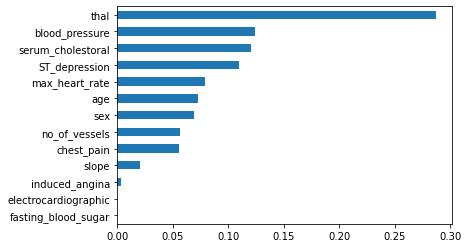

In [61]:
# Decision Tree
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=2606)

# Importer les plot feature
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

* La variable "thal" s'avère être une variable très importante.
* Selon mon hypothèse selon laquelle la variable "fasting_blood_sugar" est une variable très faible: Le graphique ci-dessus le confirme clairement.
* Le modèle d'arbre de décision apprend parfaitement le train set, et en même temps, il est complètement surajusté aux données, ce qui entraîne une mauvaise prédiction. D'autres valeurs de la variable 'max_depth' doivent être testées.


In [62]:
# vérifier le paramétre optimal'max_depth'
for i in range(1,8):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=2606)

max_depth = 1
Train accuracy: 76.89%
Test accuracy: 74.73%
max_depth = 2
Train accuracy: 78.30%
Test accuracy: 72.53%
max_depth = 3
Train accuracy: 87.74%
Test accuracy: 76.92%
max_depth = 4
Train accuracy: 91.98%
Test accuracy: 78.02%
max_depth = 5
Train accuracy: 94.81%
Test accuracy: 78.02%
max_depth = 6
Train accuracy: 97.17%
Test accuracy: 79.12%
max_depth = 7
Train accuracy: 97.64%
Test accuracy: 75.82%


=> Avec max_depth fixé à 6, le score est passé à presque 80%. A présent, KNN est plus performant que l'arbre de décision.

### 5.3. Régression logistique

La régression logistique est une technique de base de l'analyse statistique qui vise à prédire une valeur de données sur la base d'observations réalisées antérieurement. Un algorithme de régression logistique examine la relation entre une variable dépendante et une ou plusieurs variables dépendantes.

In [63]:
# Logistic Regression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 86.32%
Test accuracy: 82.42%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=> La différence négligeable entre les résultats du train et du test indique que le modèle atteint un niveau optimal. Bien que le résultat lui-même soit légèrement inférieur à celui de KNN, il reste néanmoins satisfaisant.

### 5.4. Gaussian Naive Bayes

En machine learning, naive Bayes classifiers sont une famille de classificateurs probabilistes simples basés sur l'application du théorème de Bayes avec des hypothèses fortes (naïves) d'indépendance entre les variables.


In [64]:
#Gaussian Naive Bayes
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)

Train accuracy: 85.38%
Test accuracy: 86.81%


=> Ce modèle a produit le même résultat que l'algorithme KNN principal. Bien que ce modèle soit un peu moins adapté, il n'offre pas d'hyperparamètres permettant de le régler et d'améliorer les performances globales.

### 5.5. Machine à vecteurs de support (Support Vector Machines)

Les machines à vecteurs de support sont peut-être l'un des algorithmes de machine learning les plus populaires. Il s'agit de la méthode idéale pour obtenir un algorithme très performant avec un peu de réglage. Dans un premier temps, faisons un essai avec les paramètres par défaut.


In [65]:
# Support Vector Machines
model = train_model(X_train, y_train, X_test, y_test, SVC)

Train accuracy: 67.45%
Test accuracy: 75.82%


=> Les chiffres ci-dessus ne sont en aucun cas remarquables. Je vais ajuster deux paramètres, "C" et "kernel", pour profiter pleinement de la performance du SVM.

In [66]:
# tuned SVM
model = train_model(X_train, y_train, X_test, y_test, SVC, C=0.05, kernel='linear')

Train accuracy: 84.91%
Test accuracy: 83.52%


In [ ]:
=> Avec une précision impressionnante de près de 88 %, les machines à vecteurs de support sont en avance.

### 5.6. Forêt d’arbre de décision (Random Forests)

Les forêts aléatoires sont une méthode de Machine Learning pour la classification, la régression et d'autres tâches, qui fonctionne en construisant une multitude d'arbres de décision au moment de la phase de training et en produisant la classe qui est le mode des classes (classification) ou la prédiction moyenne (régression) des arbres individuels.

Train accuracy: 100.00%
Test accuracy: 87.91%


<AxesSubplot:>

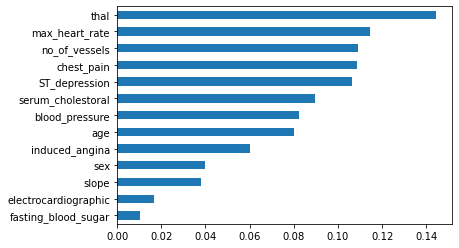

In [67]:
# Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=2606)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

=> Ce résultat n'a pas répondu à nos attentes. En modifiant le paramètre 'n_estimators', dans le but d'obtenir sûr un meilleur résultat.

In [68]:
# Forêts aléatoires tunées
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=110, random_state=2606)

Train accuracy: 100.00%
Test accuracy: 87.91%


=> Alors qu'il est habituel pour les Random Forests d'apprendre et de s'adapter parfaitement aux données de training, la précision du test a atteint le niveau impressionnant de 89% !

## 6. Conclusion

L'objectif du projet était de comparer différents algorithmes de machine learning et de prédire si une certaine personne, compte tenu de diverses caractéristiques personnelles et de symptômes, sera atteinte ou non d'une maladie cardiaque. Voici les résultats finaux.

In [69]:
# initialiser une liste vide
accuracy = []

# liste des noms d'algorithmes
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(max_depth=6, random_state=2606), LogisticRegression(), 
        GaussianNB(), SVC(C=0.05, kernel='linear'), RandomForestClassifier(n_estimators=110, random_state=2606)]

# faire une boucle à travers les algorithmes et ajouter le score dans la liste
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
# créer un dataframe à partir des résultats de précision
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.670330
Decision Trees,0.791209
Logistic Regression,0.824176
Naive Bayes,0.868132
SVM,0.835165
Random Forests,0.879121


=> Il n'est pas étonnant que les algorithmes plus complexes comme les SVM et les forêts aléatoires aient généré de meilleurs résultats que les algorithmes de base. Il est important de noter que dans la plupart des cas, le réglage des hyperparamètres est essentiel pour obtenir des résultats robustes avec ces techniques. En produisant des résultats décents, les méthodes plus simples ont également prouvé leur utilité.

Le Machine Learning a un avenir absolument brillant dans le domaine médical. Il suffit d'imaginer un endroit où il n'y a pas de spécialistes des maladies cardiaques. Avec seulement des informations de base sur les antécédents médicaux d'un patient donné, nous pouvons prédire avec précision si une maladie va se produire ou non.